In [1]:
## Import Libraries
library("tidyr")
library("ggplot2")
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
nonlinear = read.csv('../Data/nonlinear.csv')

In [7]:
head(nonlinear)

,X1,Y1,X2,Y2
,<dbl>,<dbl>,<dbl>,<dbl>
1,9.55,183.13,1.74,65.01
2,7.98,204.44,0.13,13.55
3,13.42,121.54,0.20,16.58
4,13.40,111.86,0.76,22.87
5,7.67,206.74,0.78,22.01
6,5.97,205.72,1.65,53.96


In [8]:
xy1 <- ggplot(nonlinear, aes(x = X1, y = Y1)) +
  geom_point() + stat_smooth(method = "lm", formula = y ~x + I(x^2), size =1)

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


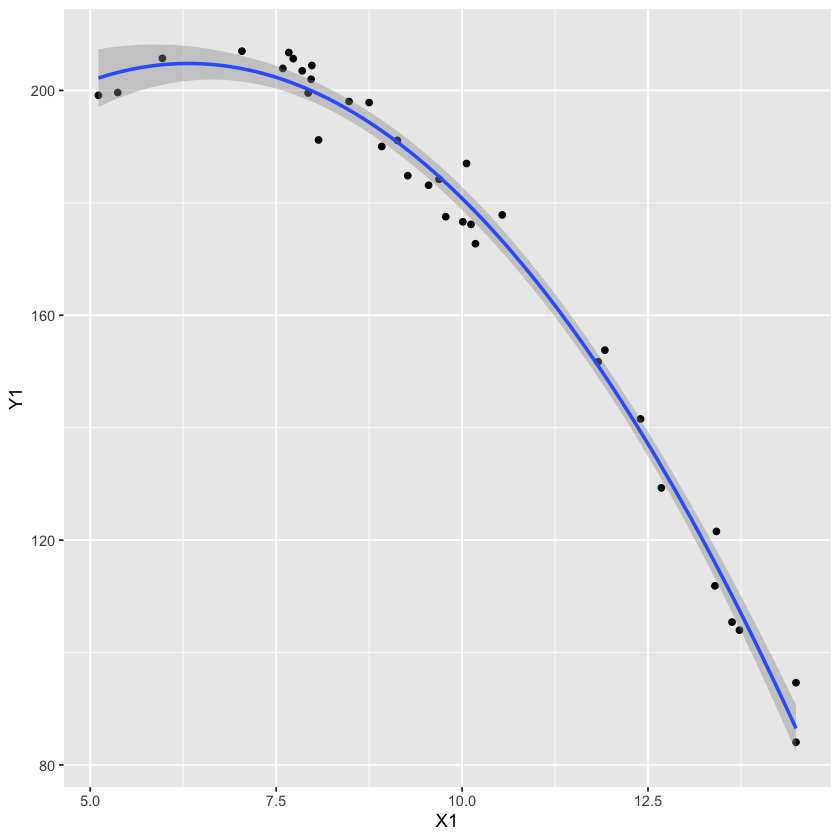

In [9]:
xy1

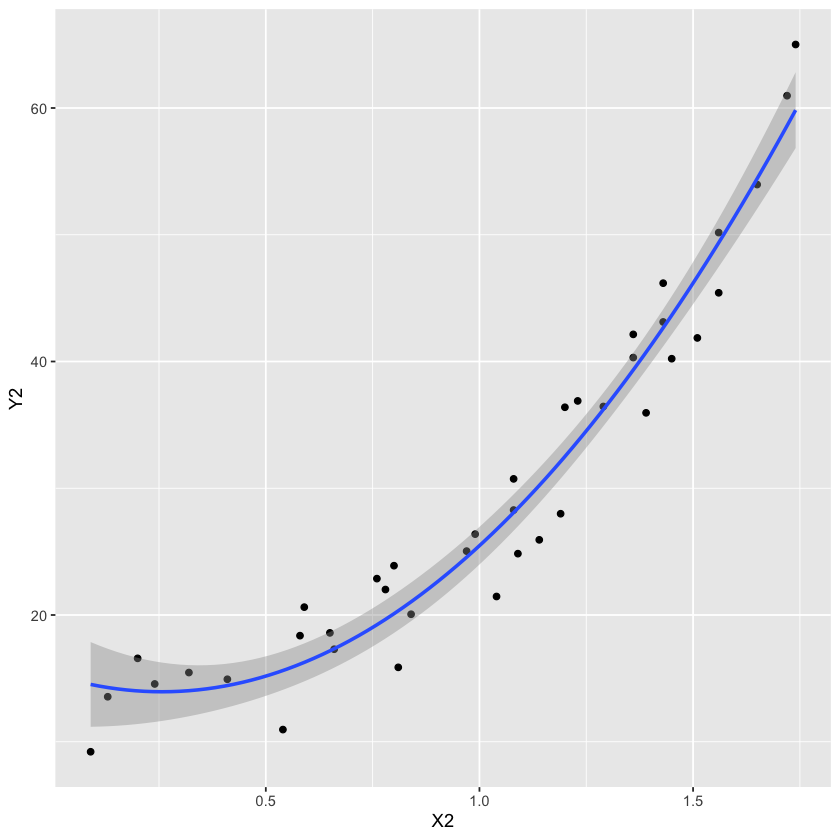

In [10]:
xy2 <- ggplot(nonlinear, aes(x = X2, y = Y2)) +
  geom_point() + stat_smooth(method = "lm", formula = y ~x + I(x^2), size =1)
xy2

In [11]:
# X1 and Y1 is a quadratic relationship
# X2 and Y2 is an exponential relationship

In [12]:
# quadratic
xsq <- nonlinear$X1^2

In [13]:
# the lm
quadModel <- lm(nonlinear$Y1 ~ nonlinear$X1+xsq)
summary(quadModel)


Call:
lm(formula = nonlinear$Y1 ~ nonlinear$X1 + xsq)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1829 -3.5405  0.3129  3.3066  8.1229 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  134.0067    10.6525   12.58 6.26e-14 ***
nonlinear$X1  22.4021     2.1788   10.28 1.14e-11 ***
xsq           -1.7723     0.1066  -16.62  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.338 on 32 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9863 
F-statistic:  1221 on 2 and 32 DF,  p-value: < 2.2e-16


In [14]:
# with a large F-statistic and a that p-value, we see this model is signifcant

In [15]:
# exponential
exMod <- lm(log(nonlinear$Y2)~nonlinear$X2)
summary(exMod)
# significant


Call:
lm(formula = log(nonlinear$Y2) ~ nonlinear$X2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43355 -0.07484  0.02495  0.09559  0.31863 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.29060    0.05693   40.23   <2e-16 ***
nonlinear$X2  0.99481    0.05189   19.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1489 on 37 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.9061 
F-statistic: 367.6 on 1 and 37 DF,  p-value: < 2.2e-16
